In [2]:
import pickle

import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# probability model
from scipy.stats import multivariate_normal
from itertools import chain

In [1]:
3954/5

790.8

In [9]:
145575*16

2329200

In [7]:
np.load("C:/Users/User/PycharmProjects/FL_AD/gt.npy").shape

(2330384,)

In [5]:
partition_path = "data/XD/video_num_partition_50_V3.pkl"
with open(partition_path, "rb") as f:
    partition = pickle.load(f)

In [6]:
partition

{'video_num': None,
 'data_indices': [{'train': [3618,
    80,
    3049,
    1571,
    2368,
    2,
    930,
    2269,
    1567,
    2724,
    535,
    298,
    452,
    1561,
    2278,
    56,
    736,
    2984,
    2744,
    1559,
    1502,
    1777,
    2436,
    3378,
    744,
    118,
    29,
    2945,
    2753,
    519,
    3015,
    3952,
    181,
    3451,
    857,
    3866,
    2939,
    967,
    1589,
    2491,
    2534,
    2052,
    1493,
    2863,
    345,
    925,
    849,
    1721,
    3323,
    1959,
    242,
    2272,
    160,
    1707,
    233,
    1150,
    1881,
    164,
    1324,
    3242,
    90,
    1523,
    1528,
    1999,
    3335,
    1540,
    2783,
    1176,
    281,
    1469,
    882,
    3380,
    3184,
    2916,
    348,
    2949,
    981,
    2119,
    3532,
    3012]},
  {'train': [904,
    3278,
    1598,
    2513,
    1005,
    2395,
    3183,
    1030,
    1506,
    478,
    141,
    1316,
    591,
    1117,
    3519,
    3941,
    1726,
    3761,
 

In [3]:
partition_path = "data/ucf/video_num_partition_10_V3.pkl"
with open(partition_path, "rb") as f:
    video_num_partition = pickle.load(f)

In [4]:
video_num_partition

{'video_num': None,
 'data_indices': [{'train': [1454,
    1120,
    404,
    563,
    886,
    1332,
    1301,
    50,
    1267,
    977,
    1015,
    899,
    1312,
    1339,
    570,
    511,
    978,
    982,
    725,
    1447,
    43,
    843,
    800,
    1380,
    926,
    1563,
    1574,
    245,
    385,
    1592,
    452,
    136,
    1480,
    712,
    1195,
    177,
    1453,
    303,
    1149,
    551,
    1366,
    1406,
    1451,
    537,
    1389,
    1576,
    1240,
    938,
    729,
    391,
    1280,
    1282,
    1404,
    824,
    885,
    1604,
    1335,
    1399,
    272,
    1058,
    180,
    1492,
    1154,
    1162,
    476,
    1065,
    1160,
    10,
    1170,
    666,
    850,
    1025,
    1485,
    957,
    1095,
    604,
    929,
    1588,
    1413,
    747,
    113,
    1465,
    415,
    867,
    931,
    508,
    966,
    1360,
    717,
    366,
    941,
    803,
    1080,
    745,
    1086,
    1239,
    1181,
    618,
    1024,
    812,
    622,
 

In [9]:
client_data_dist_stats = {}

In [10]:

for client in range(10):
    print("client", client)
    normal_cnt = 0
    abnormal_cnt = 0
    for i in video_num_partition['data_indices'][client]['train']:
        # print(i)
        if i > 809:
            normal_cnt += 1
        else:
            abnormal_cnt += 1
        # break
    client_data_dist_stats[f"Client {client}"] = [normal_cnt, abnormal_cnt]

client 0
client 1
client 2
client 3
client 4
client 5
client 6
client 7
client 8
client 9


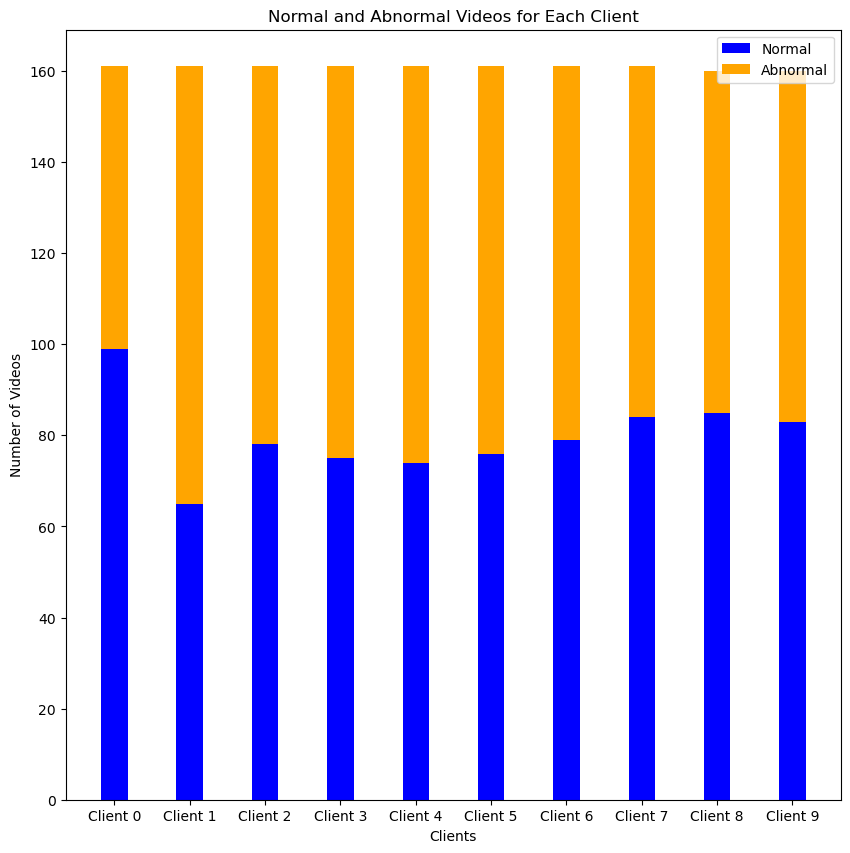

In [16]:
import matplotlib.pyplot as plt

data = {
    'Client 0': [99, 62],
    'Client 1': [65, 96],
    'Client 2': [78, 83],
    'Client 3': [75, 86],
    'Client 4': [74, 87],
    'Client 5': [76, 85],
    'Client 6': [79, 82],
    'Client 7': [84, 77],
    'Client 8': [85, 75],
    'Client 9': [83, 77]
}

clients = list(data.keys())
normal_values = [values[0] for values in data.values()]
abnormal_values = [values[1] for values in data.values()]

bar_width = 0.35
index = range(len(clients))

fig, ax = plt.subplots(figsize=(10, 10))
bar1 = ax.bar(index, normal_values, bar_width, label='Normal', color='blue')
bar2 = ax.bar(index, abnormal_values, bar_width, label='Abnormal', color='orange', bottom=normal_values)

ax.set_xlabel('Clients')
ax.set_ylabel('Number of Videos')
ax.set_title('Normal and Abnormal Videos for Each Client')
ax.set_xticks(index)
ax.set_xticklabels(clients)
ax.legend()

plt.show()


In [2]:
train_list = list(open('C:/Users/User/PycharmProjects/FL_AD/UCF_Train_ten_crop_i3d_complete_V1.txt'))

In [24]:
video_names_list = []

In [25]:
# join the first two elements
for i in train_list:
    video_name = i.split('/')[-1].split('.')[0].split('_')[:-1]
    video_name = '_'.join(video_name)
    video_names_list.append(video_name)
    # break

In [27]:
video_names_list.index('Abuse003_x264')

1

In [21]:
# join the first two elements
train_list[0].split('/')[-1].split('.')[0].split('_')[:-1]

['Abuse002', 'x264']

In [43]:
for i, (class_name , indices) in enumerate(scence_split.items()):
    print(indices)
    break

[2, 3, 6, 21, 35, 73, 74, 78, 82, 84, 86, 130, 154, 189, 194, 211, 217, 219, 228, 240, 241, 246, 255, 256, 257, 266, 277, 292, 297, 298, 299, 304, 311, 317, 324, 329, 336, 340, 809, 810, 815, 816, 820, 824, 825, 826, 833, 835, 843, 845, 847, 850, 854, 856, 859, 864, 869, 872, 875, 879, 880, 882, 885, 886, 891, 896, 897, 898, 900, 902, 904, 907, 912, 913, 917, 918, 924, 928, 932, 934, 935, 936, 938, 941, 947, 948, 950, 953, 955, 957, 961, 962, 965, 969, 970, 971, 972, 973, 974, 977, 979, 980, 982, 983, 984, 989, 995, 1000, 1002, 1004, 1005, 1006, 1009, 1010, 1016, 1022, 1024, 1025, 1031, 1032, 1035, 1041, 1044, 1046, 1047, 1050, 1051, 1056, 1059, 1061, 1062, 1067, 1069, 1075, 1076, 1077, 1082, 1085, 1087, 1088, 1089, 1091, 1092, 1093, 1094, 1095, 1096, 1099, 1100, 1101, 1102, 1107, 1108, 1110, 1115, 1116, 1128, 1134, 1136, 1137, 1144, 1153, 1161, 1168, 1172, 1176, 1180, 1183, 1185, 1188, 1193, 1199, 1201, 1202, 1210, 1211, 1223, 1225, 1235, 1290, 1298, 1320, 1321, 1339, 1347, 1350, 1351

In [1]:
a = [2, 3, 6, 21, 35, 73, 74, 78, 82, 84, 86, 130, 154, 189, 194, 211, 217, 219, 228, 240, 241, 246, 255, 256, 257, 26]

In [2]:
a[3,5]

TypeError: list indices must be integers or slices, not tuple

TypeError: 'dict_values' object is not subscriptable

In [36]:
import os

# Replace 'path_to_parent_folder' with the actual path to your parent folder
parent_folder_path = 'D:/Datasets/~ UCF Dataset division for FL/'

# List all items (files and folders) in the parent folder
items = os.listdir(parent_folder_path)

# Iterate through each item in the parent folder
for item in items:
    # Construct the full path of the current item
    item_path = os.path.join(parent_folder_path, item)

    # Check if the item is a directory
    if os.path.isdir(item_path):
        print(f"Contents of folder '{item}':")
        idicies = []
        # List all files in the current folder
        files = os.listdir(item_path)
        for file in files:
            print(file.split('.')[0])
            try:
                idicies.append(video_names_list.index(str(file.split('.')[0])))
            except:
                pass
        scence_split[item] = idicies
        # Iterate through each file in the current folder
        # for file in files:
        #     print(f"  - {file}")
        #     break
        # print()  # Add an empty line for better readability
        # break




Contents of folder 'buildingIndoor-offices-meuseums-factories-prisons-banks-factory storages':
Abuse001_x264
Abuse004_x264
Abuse005_x264
Abuse008_x264
Abuse023_x264
Abuse039_x264
Arrest001_x264
Arrest007_x264
Arrest031_x264
Arrest032_x264
Arrest036_x264
Arrest039_x264
Arrest041_x264
Arrest043_x264
Arrest046_x264
Arson051_x264
Assault010_x264
Assault026_x264
Burglary011_x264
Burglary016_x264
Burglary017_x264
Burglary032_x264
Burglary041_x264
Burglary047_x264
Burglary049_x264
Burglary058_x264
Burglary071_x264
Burglary072_x264
Burglary078_x264
Burglary088_x264
Burglary089_x264
Burglary090_x264
Burglary100_x264
Explosion022_x264
Explosion023_x264
Explosion027_x264
Explosion048_x264
Fighting004_x264
Fighting005_x264
Fighting006_x264
Fighting011_x264
Fighting019_x264
Fighting025_x264
Fighting032_x264
Fighting038_x264
Fighting042_x264
Fighting046_x264
Fighting051_x264
Normal_Videos001_x264
Normal_Videos002_x264
Normal_Videos009_x264
Normal_Videos011_x264
Normal_Videos017_x264
Normal_Videos023

In [41]:
#save dictionary 
import pickle
with open('data/ucf/scence_split_V3.pkl', 'wb') as f:
    pickle.dump(scence_split, f)

In [ ]:
class_based_indices = {}


In [ ]:
class_based_indices['Abuse'] = [0,47]
class_based_indices['Arrest'] = [48,92]
class_based_indices['Arson'] = [93,133]
class_based_indices['Assault'] = [134,180]
class_based_indices['Burglary'] = [181,267]
class_based_indices['Explosion'] = [268,296]
class_based_indices['Fighting'] = [297,341]
class_based_indices['RoadAccidents'] = [342,468]
class_based_indices['Robbery'] = [469,613]
class_based_indices['Shooting'] = [614,640]
class_based_indices['Shoplifting'] = [641,669]
class_based_indices['Stealing'] = [670,764]
class_based_indices['Vandalism'] = [765,809]



In [ ]:
len(class_based_indices)

In [ ]:
agents_data_train =[[] for i in range(len(class_based_indices))]
for i, (class_name , indices) in enumerate(class_based_indices.items()):
    agents_data_train[i] = list(range(class_based_indices[class_name][0],class_based_indices[class_name][1] + 1))

In [ ]:
agents_data_train[12]

In [ ]:
start_index = 810
end_index = 1607
num_agents = 13

# Calculate the total number of indices
total_indices = end_index - start_index + 1
print(total_indices)

# Calculate the number of indices each agent will handle
indices_per_agent = total_indices // num_agents

# Initialize a list to store the ranges for each agent
agent_ranges = []

# Distribute the indices among the agents
for i in range(num_agents):
    agent_start = start_index + i * indices_per_agent
    agent_end = start_index + (i + 1) * indices_per_agent - 1
    agent_ranges.append((agent_start, agent_end))

# Adjust the last agent's range to include any remaining indices
agent_ranges[-1] = (agent_ranges[-1][0], end_index)

for i in range(num_agents):
    agents_data_train[i].extend(list(range(agent_ranges[i][0],agent_ranges[i][1] + 1)))

In [ ]:
list(range(agent_ranges[0][0],agent_ranges[0][1]))

In [ ]:
k = 0
for i in agents_data_train:
    print(len(i))
    k += len(i)

In [ ]:
k

In [ ]:
def estimate_gauss(X):
    m = X.shape[0]   # using only first dimension as we know it has only one feature - l2 norm
    
    mu = np.mean(X, axis=0)
    var = np.cov(X.T)
    
    return mu, var

def covariance_mat(X):
    X = np.mean(X , axis= 1)
    X =  X.transpose(1,0)
    cov  = np.cov(X)

    return cov

def get_matrix(data):

    l2_norm = np.sum(np.square(data), axis=2)
    n_train_crop_l2_norm_mean = np.mean(l2_norm, axis= 1)

    return n_train_crop_l2_norm_mean


def diff_l2(new_repr):

    l2_norms = []
    for i in range(len(new_repr)):
        l2_norms.append(get_matrix(new_repr[i]))

    mean_v_l2 = []
    for i in range(len(l2_norms)):
        mean_v_l2.append(np.diff(l2_norms[i], n=1).max())
    return mean_v_l2

In [ ]:
cluster_path = f"data/ucf/clusters/{9}_of_{10}_abnormal.pkl"
with open(cluster_path, "rb") as f:
        abnormal_set = pickle.load(f)    

In [ ]:
params_entropy = {}
for i, (idel, sample) in enumerate(abnormal_set.items()):
    if idel > 809:
        class_name = "Normal"
    else:
        class_name = "Abnormal"
    params_entropy[idel] = [class_name]
    # break
params_entropy

In [ ]:
params = []
top_k = 15
for (idel, sample) in abnormal_set.items():
    entropy = 0

    param_1 = get_matrix(sample) # l2 norm
    mu, var = estimate_gauss(param_1) # mean and variance of l2 norm

    l2_diff = np.diff(param_1, n=1) # max diff
    var_diff = np.var(l2_diff) # variance of max diff

    param_2 = covariance_mat(sample) # covariance matrix
    cov_var_sum = np.sum(np.diag(param_2))  # sum of diagonal elements
    param_2 = np.where(param_2 == 0, 0.000000001,param_2)
    # param_2 = param_2[~np.isnan(param_2)]
    s= np.linalg.eigvals(param_2) # singular values
    for i in s[:top_k]:
        entropy += (i * np.log(i))  # entropy of covariance matrix


    params.append((var_diff, entropy))

In [ ]:
for i, (idel, sample) in enumerate(abnormal_set.items()):
    if idel > 809:
        class_name = "Normal"
    else:
        class_name = "Abnormal"
    params_entropy[idel] = [class_name,params[i][1]]
    # break

In [ ]:
params_entropy

In [ ]:
sum = 0
c = 0
for i in params:
    sum += i[1]
    c += 1

np.real(sum)/c

In [ ]:
np.real(1)

In [ ]:
cluster_stats = {}


In [ ]:
cluster_stats["Clusetr_9"] = np.real(sum)/c

In [ ]:
cluster_stats

In [ ]:
agents_data_train =[[] for i in range(len(class_based_indices))]
for i, (class_name , indices) in enumerate(class_based_indices.items()):
    agents_data_train[i] = list(range(class_based_indices[class_name][0],class_based_indices[class_name][1]))
    
    

In [ ]:
train_list = list(open('C:/Users/User/PycharmProjects/FL_AD/UCF_Train_ten_crop_i3d_complete_V1.txt'))

In [ ]:
train_list[809]

In [ ]:
agents_data_train[13]

In [ ]:
partition_path = "data/ucf/clusters/1_abnormal.pkl"
with open(partition_path, "rb") as f:
    video_num_partition = pickle.load(f)

In [ ]:
all_abnormal  = {}

In [ ]:
i = 0
cluster_path =f"data/ucf/clusters/{i}_abnormal.pkl"
with open(cluster_path, "rb") as f:
        abnormal_list = pickle.load(f) 

In [ ]:
abnormal_list

In [ ]:
for i in range(10):
    cluster_path =f"data/ucf/clusters/{i}_abnormal.pkl"
    with open(cluster_path, "rb") as f:
            abnormal_list = pickle.load(f)    
    all_abnormal.update(abnormal_list)

In [ ]:
all_abnormal

In [ ]:
for (idel, sample) in all_abnormal.items():
    print(idel)
    # break

In [ ]:
train_list = list(open('C:/Users/User/PycharmProjects/FL_AD/UCF_Train_ten_crop_i3d_complete_V1.txt'))

In [ ]:
train_list[idel]

In [ ]:
from_id = train_list[819].split('\n')[0].split(',')[1]
to_id = train_list[819].split('\n')[0].split(',')[2]
from_id, to_id

In [ ]:
partition_path = "data/ucf/video_num_partition_25_V3.pkl"
with open(partition_path, "rb") as f:
    video_num_partition = pickle.load(f)

In [ ]:
train_data = np.load("C:/Users/User/PycharmProjects/FL_AD/concat_UCF_V2.npy") #UCF
# train_data = np.load("/home/anas.al-lahham/AD_Unsupervised/concat_XD_I3D.npy") #XD
train_data.shape

### C2FPL 


In [ ]:
def covariance_mat(X):
    X = np.mean(X , axis= 1)
    X =  X.transpose(1,0)
    cov  = np.cov(X)

    return cov

def estimate_gauss(X):
    
    m = X.shape[0]   # using only first dimension as we know it has only one feature - l2 norm
    
    mu = np.mean(X, axis=0)
    var = np.cov(X.T)
    
    return mu, var


def get_matrix(data):
    # 1st: L2 norm [Euclidean Distance]
    # l2_norm = np.sum(np.square(data), axis=2)
    l2_norm = np.sum(np.square(data), axis=2)
    n_train_crop_l2_norm_mean = np.mean(l2_norm, axis= 1)
    # print(n_train_crop_l2_norm_mean.shape)
    
    # n_train_crop_l2_norm_mean_normal = Transform_normal(n_train_crop_l2_norm_mean)
    return n_train_crop_l2_norm_mean

In [ ]:
sample  = train_data[:70]
# sample = np.mean(sample, axis= 1 )
# sample = sample.transpose(1,0)

In [ ]:
sample.shape

In [ ]:
cov_sample = covariance_mat(sample)
cov_sample.shape

In [ ]:
top_k = 30
param = cov_sample[:top_k, :top_k]

In [ ]:
param.shape

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
x= pca.fit(param).transform(param)

In [ ]:
x.shape

In [ ]:
def C2FPL_client(client_partition,client_video_num_partition, client_id):
    new_repr = []
    n_num = 0
    a_num = 0
    for i  in range(len(client_partition['train'])):
        if client_video_num_partition['train'][i] > 808: 
            n_num += 1
        else:
            a_num += 1
        new_repr.append(train_data[client_partition['train'][i]])
        # break
    print(f"Client {client_id} has {n_num} normal videon and {a_num} abnormal videos \n Total number of videos of {n_num + a_num}")


    params = []
    for i in range(len(new_repr)):
        # l2_norm = np.sum(np.square(new_repr[i]), axis=2)
        # mean_l2 =  np.mean(l2_norm, axis= 1)
        param = get_matrix(new_repr[i])
        mu, var = estimate_gauss(param)
        # print( mu, var )
        # l2mean = np.sum(np.square(new_repr[i]), a
        # xis=1).mean()
        # mmean = np.mean(new_repr[i], axis=0)
        diff_max = np.diff(param, n=1).max()
        params.append((mu, diff_max ))

    from sklearn.mixture import GaussianMixture
    # import time


    gmm = GaussianMixture(n_components=2)
    # gmm_scores = gmm.score_samples(params)
    labels = gmm.fit_predict(params)

    # n = 0
    # a = 0
    # for i,v in enumerate(labels):
    #     if v == 0:
    #         if client_video_num_partition['train'][i] > 809: 
    #             n += 1
    #     else:
    #         if client_video_num_partition['train'][i] < 809:
    #             a += 1



    # print(f"correct normal videos are {n} with acc of {n/n_num}  \n and correct abnormal videos are {a} with acc of {a/a_num} ")



    normal_set = {}
    abnormal_set = {}
    for i in range(len(new_repr)):
        if labels[i] == 0.0:
            normal_set[client_video_num_partition['train'][i]] = new_repr[i]
        else:
            abnormal_set[client_video_num_partition['train'][i]] = new_repr[i]




    l2_norms_N = np.empty(0,)
    for (idel, sample) in normal_set.items():
        
        # print(sample.shape)
        

        l2_norms_N = np.append(l2_norms_N,get_matrix(sample))

    mu_GMM, var_GMM = estimate_gauss(np.array(l2_norms_N))
    # probability model
    from scipy.stats import multivariate_normal
    p = multivariate_normal(mu_GMM, var_GMM)


    ground_truth = {} 
    length = 0.2 
    for (idel, sample) in abnormal_set.items(): 

        # feature extraction 
        # sample_matrix = np.sum(np.square(sample), axis=1)  # for just l2
        sample_matrix = get_matrix(sample)
        
        # get p values
        probs = p.pdf(sample_matrix)
        temp_list = []
        temp_list += [0.0] * len(probs)
        
        window_size = int(len(probs) * length)  # fixed
        temp = []
        for idx in range(0, len(probs) - window_size + 1):
            arr = 0
            for i in range(idx, idx + window_size - 1):
                arr += abs(probs[i+1] - probs[i])
            temp.append(arr)

        for i in range(temp.index(max(temp)), temp.index(max(temp)) + window_size):
            temp_list[i] = 1.0

        ground_truth[idel] = temp_list



    final_gt = {}

    for i in range(len(new_repr)):
        idx_in_all = client_video_num_partition['train'][i]
        if idx_in_all in normal_set.keys():
            final_gt[idx_in_all] = [0.0] * new_repr[i].shape[0]
        else:
            final_gt[idx_in_all] = ground_truth[idx_in_all]
    # print(final_gt)
    return final_gt

In [ ]:
len(video_num_partition['data_indices'])

In [ ]:
total_clients = partition['separation']['total']

pl = {}

pl_idx = list(range(1608))
for i in pl_idx :
    pl[i] = None



for i in range(total_clients):
    client_pl = C2FPL_client(partition['data_indices'][i],video_num_partition['data_indices'][i], i)
    for k in client_pl.keys():
        pl[k] = client_pl[k]

In [ ]:
pl_array = [pls for pls in pl.values()]
flattened = []
for i in pl_array:
    flattened += i

### Draft experiments


In [ ]:
import pandas as pd

data = {'client_id': list(range(25)),
         
        'num_of_normal': None,
        'num_of_abnormal': None,
        'Total_vids': None,
        'normal_acc %': None,
        'abnormal_acc %': None}

df = pd.DataFrame(data)

In [ ]:
# df.loc[df['client_id']== 1 , 'acc'] = 150
df.head()

In [ ]:

df = pd.DataFrame()
for id in range(5):
    client_id = id
    new_repr = []
    n_num = 0
    a_num = 0
    for i  in range(len(partition['data_indices'][client_id]['train'])):
        if video_num_partition['data_indices'][client_id]['train'][i] > 809: 
            n_num += 1
        else:
            a_num += 1
        new_repr.append(train_data[partition['data_indices'][client_id]['train'][i]])
        # break
    # print(f"Client 1 has {n_num} normal videon and {a_num} abnormal videos \n Total number of videos of {n_num + a_num}")

    # print(f"normal acc for client {id} is {sorted_vids[-10:].count(n) /10}")


In [ ]:
client_id = 0
new_repr = []
n_num = 0
a_num = 0
for i  in range(len(partition['data_indices'][client_id]['train'])):
    if video_num_partition['data_indices'][client_id]['train'][i] > 808: 
        n_num += 1
    else:
        a_num += 1
    new_repr.append(train_data[partition['data_indices'][client_id]['train'][i]])

print(f"Client 1 has {n_num} normal videon and {a_num} abnormal videos \n Total number of videos of {n_num + a_num}")

In [ ]:
nalist = np.load("C:/Users/User/PycharmProjects/FL_AD/nalist.npy") #UCF
nalist

In [ ]:
# new_repr = []
# for i, (fromid, toid) in enumerate(nalist):
#     new_repr.append(train_data[fromid:toid])

len(new_repr)

In [ ]:
param_2 = covariance_mat(new_repr[i])

In [ ]:
param_2.shape

In [ ]:
_ , s , _ = np.linalg.svd(param_2)
s.shape

In [ ]:
max(s) / min(s[:100])

In [ ]:
param_1 = get_matrix(new_repr[i]) # l2 norm
mu, var = estimate_gauss(param_1) # mean and variance of l2 norm

l2_diff = np.diff(param_1, n=1) # max diff
_, var_diff = estimate_gauss(l2_diff)

In [ ]:
l2_diff.shape

In [ ]:
var_diff, np.var(l2_diff)

In [ ]:
params = []
top_k = 50
for i in range(len(new_repr)):
    entropy = 0

    param_1 = get_matrix(new_repr[i]) # l2 norm
    mu, var = estimate_gauss(param_1) # mean and variance of l2 norm

    l2_diff = np.diff(param_1, n=1) # max diff
    var_diff = np.var(l2_diff) # variance of max diff

    param_2 = covariance_mat(new_repr[i]) # covariance matrix
    cov_var_sum = np.sum(np.diag(param_2))  # sum of diagonal elements
    _, s, _ = np.linalg.svd(param_2) # singular values
    for i in s:
        entropy += (i * np.log(i))  # entropy of covariance matrix


    params.append((mu, var, var_diff, cov_var_sum, entropy))

In [ ]:
new_params_df  = pd.DataFrame(columns=["Class", "params"])

In [ ]:
new_params_df.head()

In [ ]:
for i  in range(len(new_repr)):
    if video_num_partition['data_indices'][client_id]['train'][i] > 809:
        plt.scatter(params[i][1], params[i][4],  c= "blue", marker="o")
        # new_params_df.loc[i] = ["Normal", params[i]]
    else:
        plt.scatter(params[i][1], params[i][4], c= "red", marker="x")
        # new_params_df.loc[i] = ["Abnormal", params[i]]
     

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, MeanShift, DBSCAN

In [ ]:
gmm = GaussianMixture(n_components=2, max_iter=150, random_state=0)
# gmm_scores = gmm.score_samples(params)
# labels = gmm.fit_predict(params)

y_gmm = gmm.fit_predict(params)
# print(y_gmm.sum(), y_gmm.sum() / len(y_gmm))

# score = y_gmm 
# score = gmm.score_samples(params) 
# pct_threshold = np.percentile(score, 4)
# print(f'The threshold of the score is {pct_threshold:.2f}') 
# res = np.array([1 if x < pct_threshold else 0 for x in score]) 
res = gmm.fit_predict(params)
# print(res.sum())


abnormal_portion = np.where(res == 1)[0]
normal_portion = np.where(res == 0)[0]
normal_portion.shape, abnormal_portion.shape

abag = list(zip(list(np.array(params)[abnormal_portion]), abnormal_portion))
nbag = list(zip(list(np.array(params)[normal_portion]), normal_portion))

In [ ]:
nu = 1.0
step = 1
import time
# start = time.time()
while len(abag) / len(nbag) < nu:
    
    temp_bag = nbag
    res = gmm.fit_predict([list(x[0]) for x in np.array(temp_bag)])
    # score = y_gmm 
    # score = gmm.score_samples([list(x[0]) for x in np.array(temp_bag)]) 
    # pct_threshold = np.percentile(score, 4) 
    # res = np.array([1 if x < pct_threshold else 0 for x in score]) 
    # print(f'The threshold of the score in step {step} is {pct_threshold:.2f}, abnormal part: {res.sum()}') 
    
    abnormal_portion = np.where(res == 1)[0]
    normal_portion = np.where(res == 0)[0]
    
    abag += [(x[0], x[1]) for x in np.array(temp_bag)[abnormal_portion]]
    nbag = [(x[0], x[1]) for x in np.array(temp_bag)[normal_portion]]

    step += 1

In [ ]:
len(abag), len(nbag)

In [ ]:
print('correctness acc: ', np.where(np.array([video_num_partition['data_indices'][client_id]['train'][x[1]] for x in abag]) <= 809)[0].shape[0] / len([x[1] for x in abag]))


print('correctness acc: ', np.where(np.array([video_num_partition['data_indices'][client_id]['train'][x[1]] for x in nbag]) > 809)[0].shape[0] / len([x[1] for x in nbag]))

In [ ]:
np.trace(np.matmul(param_2, np.log(param_2)))

In [ ]:

# import time


gmm = GaussianMixture(n_components=2, max_iter=150, random_state=0)
# gmm_scores = gmm.score_samples(params)
labels = gmm.fit_predict(params)

np.where(labels== 0)[0].shape, np.where(labels == 1)[0].shape

In [ ]:
params = []
top_k = 3
for i in range(len(new_repr) ):

    param = covariance_mat(new_repr[i])

    params.append(np.diagonal(param[:top_k, :top_k]))
len(params)

In [ ]:
params = []
for i in range(len(new_repr)):
    # l2_norm = np.sum(np.square(new_repr[i]), axis=2)
    # mean_l2 =  np.mean(l2_norm, axis= 1)
    param = get_matrix(new_repr[i])
    mu, var = estimate_gauss(param)
    # print( mu, var )
    # l2mean = np.sum(np.square(new_repr[i]), a
    # xis=1).mean()
    # mmean = np.mean(new_repr[i], axis=0)
    diff_max = np.diff(param, n=1).max()
    params.append((mu, var,))
len(params)


In [ ]:
np.diagonal(params[0]).shape

In [ ]:
mean = []
var = []
for i in params:
    mean.append(i[0])
    var.append(i[1])

In [ ]:
max(mean)

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(params)):
    if i < 809:
        plt.scatter(mean[i], var[i], marker='x', c='red')
    else: 
        plt.scatter(mean[i], var[i], marker='x', c='blue')

In [ ]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN

Kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(params)
Kmeans.labels_
np.where(Kmeans.labels_== 0)[0].shape, np.where(Kmeans.labels_ == 1)[0].shape

In [ ]:
from sklearn.mixture import GaussianMixture
# import time


gmm = GaussianMixture(n_components=2, max_iter=150, random_state=0, covariance_type='spherical')
# gmm_scores = gmm.score_samples(params)
labels = gmm.fit_predict(params)


video_labels_1 = labels
np.where(labels== 0)[0].shape, np.where(labels == 1)[0].shape


In [ ]:
n = 0
a = 0
cluster_1 =  []
cluster_2 =  []
for i,v in enumerate(labels):
    if v == 1:
       
       if video_num_partition['data_indices'][client_id]['train'][i] > 808:
          cluster_1.append('n')
       else:
          cluster_1.append('a')
       if video_num_partition['data_indices'][client_id]['train'][i] > 808: 
         n += 1
    else:
       if video_num_partition['data_indices'][client_id]['train'][i] <= 808:
          cluster_2.append('n')
       else:
          cluster_2.append('a')
       if video_num_partition['data_indices'][client_id]['train'][i] < 808: 
         a += 1
# video_num_partition['data_indices'][0]['train'][i]


print(f"correct normal videos are {n} with acc of {n/n_num}  \n and correct abnormal videos are {a} with acc of {a/a_num} ")

In [ ]:
set_1 = {}
set_2 = {}


for i in range(len(new_repr)):
    if labels[i] == 0.0:
        set_1[video_num_partition['data_indices'][client_id]['train'][i]] = new_repr[i]
    else:
        set_2[video_num_partition['data_indices'][client_id]['train'][i]] = new_repr[i]

In [ ]:
len(set_1)

In [ ]:
pl = {}

pl_idx = list(range(1608))
for i in pl_idx :
    pl[i] = None

In [ ]:
for i in abnormal_set.keys():
    pl[i] = abnormal_set[i]



In [ ]:
max_idx = np.argsort(mean_v_l2)[-1]

if max_idx in np.where(labels== 0)[0]:
    normal_set = set_1
    abnormal_set = set_2
else:
    normal_set = set_2
    abnormal_set = set_1   





In [ ]:
list(normal_set.keys())[:10]

In [ ]:
mean_v_l2 = []
for i in range(len(l2_norms)):
    mean_v_l2.append(np.diff(l2_norms[i], n=1).max())
l2_norms_N = np.empty(0,)
for (idel, sample) in normal_set.items():
    
    # print(sample.shape)
    
    mean_v_l2.append(np.diff(get_matrix(sample), n=1).max())
    l2_norms_N = np.append(l2_norms_N,get_matrix(sample))

In [ ]:
l2_norms_N = np.empty(0,)
for (idel, sample) in normal_set.items():
    
    # print(sample.shape)
    

    l2_norms_N = np.append(l2_norms_N,get_matrix(sample))

In [ ]:
len(l2_norms_N)

In [ ]:
len(normal_set), len(abnormal_set)

In [ ]:
mu_GMM, var_GMM = estimate_gauss(np.array(l2_norms_N))
# probability model
from scipy.stats import multivariate_normal
p = multivariate_normal(mu_GMM, var_GMM)

In [ ]:
ground_truth = {} 
length = 0.2 
for (idel, sample) in abnormal_set.items(): 
    print(idel)


In [ ]:
ground_truth = {} 
length = 0.2 
for (idel, sample) in abnormal_set.items(): 

    # feature extraction 
    # sample_matrix = np.sum(np.square(sample), axis=1)  # for just l2
    sample_matrix = get_matrix(sample)
    
    # get p values
    probs = p.pdf(sample_matrix)
    temp_list = []
    temp_list += [0.0] * len(probs)
    
    window_size = int(len(probs) * length)  # fixed
    temp = []
    for idx in range(0, len(probs) - window_size + 1):
        arr = 0
        for i in range(idx, idx + window_size - 1):
            arr += abs(probs[i+1] - probs[i])
        temp.append(arr)

    for i in range(temp.index(max(temp)), temp.index(max(temp)) + window_size):
        temp_list[i] = 1.0

    ground_truth[idel] = temp_list

In [ ]:
for i in video_num_partition['data_indices'][client_id]['train']:
    print(i)

In [ ]:
final_gt = {}

for i in range(len(new_repr)):
    idx_in_all = video_num_partition['data_indices'][client_id]['train'][i]
    if idx_in_all in normal_set.keys():
        final_gt[idx_in_all] = [0.0] * new_repr[i].shape[0]
    else:
        final_gt[idx_in_all] = ground_truth[idx_in_all]

In [ ]:
len(final_gt)

In [ ]:
final_gt = []
abnormal_gt = []
for i in range(len(new_repr)):
    if i in normal_set.keys():
        final_gt += [0.0] * new_repr[i].shape[0]
    else:
        final_gt += ground_truth[i]
        abnormal_gt+= ground_truth[i]

In [ ]:
final_gt